### Samfunnsøkonomisk analyse av turistskatt
En utredning til nærings- og fiskeridepartementet. 
Februar 2023

## SOK-1006
Mikroøkonomi: økonomisk atferd, markeder og priser


### Innhold                                                                                                                                       
1 Innledning	                                                                                                                                     
1.1 Begrunnelse for innføring av turistskatt og forklaring av begrepet	                                                                             
1.2 Potensielle fordeler ved innføring av turistskatt	                                                                                          
1.2.1 Bærekraftig turisme	                                                                                                                         
1.2.2 Finansiering av lokal infrastruktur og tjenester	                                                                                            
1.2.3 Forebygging av overbelastning og overturisme	                                                                                                 
1.3 Tidligere erfaring med turistskatter	                                                                                                         
1.4 utredningens struktur	                                                                                                                        
2 Bakgrunn – turistnæringen i norge	                                                                                                                             
2.1 Størrelse og utvikling i reiselivssektoren	                                                                                                     
2.2 Økonomien bak norsk reiseliv	                                                                                                            
2.3 Sesongvariasjoner	                                                                                                                            
3 – Samfunnsøkonomiske effekter av en turistskatt	                                                                                                 
3.1 formål og potensielle fordeler ved innføring av turistskatt på overnattinger	                                                                 
3.2 Markedet for overnattinger uten en skatt	                                                                                          
3.2.1 hvordan endringer kan vi forvente ved innføring av en turistskatt?	                                                                       
3.3 Potensielle effektivitets- og fordelingseffekter av en turistskatt	                                                                             
3.3.1 Endring i turistsammensetning	                                                                                          
3.3.2 Dødvektstap	                                                                                                            
3.3.3 Forebygging av dødvektstap	                                                                                          
3.3 Priselastisitet	                                                                                                            
3.4 oppnår vi ønsket effekt?	                                                                                          
4 Konklusjon	                                                                                                            
Bibliografi	

### 1 Innledning 

«Før Covid-19 pandemien var reiseliv en av verdens raskest voksende næringer» (Nærings- og fiskeridepartementet, u.d.)


Nærings- og fiskeridepartementet kunngjorde i januar 2023 at Regjeringen åpner for innføring av besøksbidrag i norske kommuner. Resultatet av å innføre en slik avgift avhenger mye av måten denne implementeres på - størrelsen på avgiften, hva inntektene går til osv.

#### 1.1 Begrunnelse for innføring av turistskatt og forklaring av begrepet

Reiselivsnæringen er en næring med enormt potensiale. Det er derfor viktig for norsk økonomi å vedlikeholde turismen i Norge – det er en sektor med høyt bruttoprodukt, og  relativt mange sysselsatte. Figur 1 viser utviklingen av sysselsetting innenfor reiselivssektoren, målt i tusener av årsverk. En kan her se på utviklingen i årene før pandemien at sektoren kan nå store høyder om den fortsetter å vokse, slik den gjorde før 2019/2020. 

In [1]:
#importerer pakker
import json
import pandas as pda 
import requests
import numpy as np
import sympy as sp
from pyjstat import pyjstat
import matplotlib.pyplot as plt

In [2]:
#laster inn data ved hjelp av en JSON-spørring
postUrl = "https://data.ssb.no/api/v0/no/table/10604/"
apiQuery = {
    "query": [
        {
            "code": "Reiseliv",
            "selection": {
                "filter": "item",
                "values": [
                    "NORTOT"
                ]
            }
        }
    ],
    "response": {
        "format": "json-stat2"
    }
}

def apiToDataframe(postUrl, query):



    res = requests.post(postUrl, json=query)

    ds = pyjstat.Dataset.read(res.text)

    df = ds.write('dataframe')

    df_id = ds.write('dataframe', naming='id')

    return df, df_id, ds

In [3]:
df, df_id, ds = apiToDataframe(postUrl, apiQuery)
df

,reiselivsnæring,statistikkvariabel,år,value
0,SUM REISELIVSNÆRINGENE,"Sysselsetting (1 000 årsverk, heltidsekvivalen...",2011,158.9
1,SUM REISELIVSNÆRINGENE,"Sysselsetting (1 000 årsverk, heltidsekvivalen...",2012,160.1
2,SUM REISELIVSNÆRINGENE,"Sysselsetting (1 000 årsverk, heltidsekvivalen...",2013,162.2
3,SUM REISELIVSNÆRINGENE,"Sysselsetting (1 000 årsverk, heltidsekvivalen...",2014,165.7
4,SUM REISELIVSNÆRINGENE,"Sysselsetting (1 000 årsverk, heltidsekvivalen...",2015,168.3
5,SUM REISELIVSNÆRINGENE,"Sysselsetting (1 000 årsverk, heltidsekvivalen...",2016,172.5
6,SUM REISELIVSNÆRINGENE,"Sysselsetting (1 000 årsverk, heltidsekvivalen...",2017,175.9
7,SUM REISELIVSNÆRINGENE,"Sysselsetting (1 000 årsverk, heltidsekvivalen...",2018,178.9
8,SUM REISELIVSNÆRINGENE,"Sysselsetting (1 000 årsverk, heltidsekvivalen...",2019,182.9
9,SUM REISELIVSNÆRINGENE,"Sysselsetting (1 000 årsverk, heltidsekvivalen...",2020,165.6


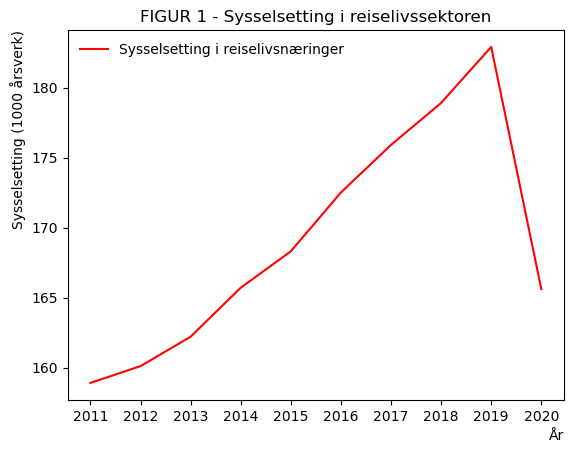

In [4]:
#plotter
fig, ax = plt.subplots()
ax.set_ylabel('Sysselsetting (1000 årsverk)', loc='top')
ax.set_xlabel('År', loc='right')
ax.plot(df['år'], df['value'], label='Sysselsetting i reiselivsnæringer', color = "red")
ax.set_title('FIGUR 1 - Sysselsetting i reiselivssektoren')
ax.legend(loc='best',frameon=False);

Data hentet fra SSB tabell 09174

Men turisnæringen har også negative konsekvenser, i form av forurensing av vann og luft, forsøpling osv. Turisme belaster naturen, og kan sette store spor. Dette er en av grunnene til at besøksbidrag i form av turistskatt for overnattinger kommer opp til diskusjon. «En turistskatt er en avgift som skal bidra til å finansiere fellesgodene i reiselivet».(NHO reiseliv - turistskatt, u.d.) En turistskatt for overnattinger vil komme i form av en avgift som hoteller, ferieboliger og andre overnattingssteder vil ta på vegne av staten, som et fast beløp eller en prosentandel av overnattingsprisen.

### 1.2 Potensielle fordeler ved innføring av turistskatt

#### 1.2.1 Bærekraftig turisme 

Som nevnt har turisme ofte en negativ påvirkning på miljøet. Dette ved å forårsake overbelastning på lokalt miljø og ressurser samt økt trafikk og avfall. En turistskatt kan bidra til å finansiere miljøtiltak som gjør det mulig å opprettholde bærekraftig turisme i området.

#### 1.2.2 Finansiering av lokal infrastruktur og tjenester

Turistskatter kan også bidra til å finansiere lokal infrastruktur og tjenester. Turister som besøker et område nyter godt av lokale tjenester og infrastruktur, men det er ofte kommunene som må betale for å opprettholde disse. Dette kan være ting som veier, parker, toaletter og lignende. Turistskatter kan bidra til å finansiere slike vedlikeholdtiltak. Dette vil igjen bidra til å holde turistmålet attraktivt og konkurransedyktig, selv om prisen stiger. 

#### 1.2.3 Forebygging av overbelastning og overturisme

Flere byer i verden preges av overturisme og for store turiststrømmer. Her kan turistskatter bidra til å gjøre destinasjonen dyrere, og dermed allokere turismen. Mange populære destinasjoner har store forskjeller i turismen i løpet av et år - med en stor høysesong preget av mye turisme, og færre turister resten av året. I en slik situasjon kan en bruke sesongjusterte turistskatter til å utjevne turiststrømmene, ved å øke prisene i høysesongen, og senke de resten av året.     

#### 1.3 Tidligere erfaring med turistskatter

Norge har historisk sett ikke hatt noen form for turistskatt eller besøksbidrag. Lofoten har lenge arbeidet for å innføre en slik ordning, og er i aktiv prosess med å implementere dette. Dette vil dermed bli det første norske turistmålet til å innføre dette. Internasjonalt har andre europeiske land hatt turistskatter lenge, og ideen er allerede godt utbredt. 
Turistskatter for overnatting spesifikt (Occupancy tax), er mye brukt i Europa. Før disse skattene innføres gjøres det nøye evalueringer angående hvordan en skal gå frem for å innføre skatter samtidig som en skal holde destinasjonen konkurransedyktig og som et godt alternativ for turister. Grunnet dette varierer avgiftene basert på hvor attraktiv destinasjonen er i utgangspunktet, målgruppen for potensielle turister og andre faktorer.
I EU-landene varierer skatter på overnattinger mellom 0.1 euro (den laveste avgiften i Bulgaria) til 7.5 euro (den høyeste avgiften i Belgia).  (European Commision, European Union) (Data her hentet fra https://single-market-economy.ec.europa.eu/sectors/tourism/eu-funding-and-businesses/business-portal/financing-your-business/tourism-related-taxes-across-eu_en, uten datostempling – så disse prisene kan være noe utdatert). 
Erfaringer fra innføringen av disse skattene har vært noe blandet. Noen steder fungerer skatteleggingen som planlagt, og skattene bidrar til å forebygge overturisme og drar inn inntekter til infrastruktur osv. Samtidig finnes det tilfeller hvor det oppstår uventede vanskeligheter ved innføringen av skatten. Et eksempel på dette kan være i innføringen av en «day tripper»-skatt i Venezia. Venezia har hatt en turistskatt på overnattinger siden 2011 (Buckley, 2022), men dette har vist seg å ikke være tilstrekkelig, og lokale beboere mener at en stor del av problemet ligger i såkalte «day-trippers». Dette er turister som ikke leier losji i Venezia, men kommer dit på dagsturer, og dermed ikke betaler skatter og bidrar som resultat lite til den lokale økonomien. Byen annonserte derfor i 2019 at de skulle innføre en turistskatt for å overhodet komme inn i byen - noe som viste seg å være svært komplisert. Skatten har blitt utsatt to ganger, først i 2020 og senere 2022. Dette fordi det er vanskelig å finne systemer for å håndheve en slik skatt,  og byen har allerede brukt store summer for å skape IT-systemer for å motta skatten. ( (Venezia Autentica). Skatten er nå planlagt innført ved hjelp av en mobil-app fra og med sommeren 2023. 

#### 1.4 utredningens struktur

Utredningen er skrevet i 4 deler
Innledningen ovenfor gir en introduksjon til utredningens tema, formål og bakgrunn.
Kapittel 2 introduserer leseren for markedet vi skal analysere, slik at vi kan etablere størrelsen og viktigheten av næringen, samt utviklingen de siste årene. 
I kapittel 3 gjennomfører vi selve analysen. Her undersøker vi de forskjellige utfallene en skattelegging på sektoren potensielt kan medføre. Vi drøfter også hvordan diverse negative effekter kan ungås, samt legger frem det forventede utfallet.
Til slutt brukes den siste delen til konklusjon og anbefalinger. Her oppsummerer vi funnene våre, og kommer med våre anbefalinger til fiskeri- og næringsdepartementet. 

### 2 Bakgrunn – turistnæringen i norge

#### 2.1 Størrelse og utvikling i reiselivssektoren

Som nevnt er turistnæringen av stor betydning for norsk økonomi. Næringen var i voldsom vekst i årene opp mot 2019, hvor den traff sitt høyeste punkt, før den store nedgangen som følge av den globale Covid-19 pandemien. I 2019 stod reiselivsnæringene for 4,2% av BNP i Fastlands-Norge  (SSB, 2022)
Figur 2 viser utviklingen av antall utleide rom fra hotell og lignende tjenester i Norge (dette inkluderer private utleieavtaler, AirBnb osv). Vi kan her se at dette er på stø kurs til å nå tilbake til nivåene som var før pandemien, noe som forsterker viktigheten av å holde turismen i Norge attraktiv og konkurransedyktig.


In [5]:
postUrl = "https://data.ssb.no/api/v0/no/table/13156/"
apiQuery ={
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "vs:LandetNyn",
        "values": [
          "0N"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "UtleigdeRom"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}
 

def apiToDataframe(postUrl, query):



    res = requests.post(postUrl, json=query)

    ds = pyjstat.Dataset.read(res.text)

    df = ds.write('dataframe')

    df_id = ds.write('dataframe', naming='id')

    return df, df_id, ds

In [6]:
df, df_id, ds = apiToDataframe(postUrl, apiQuery)

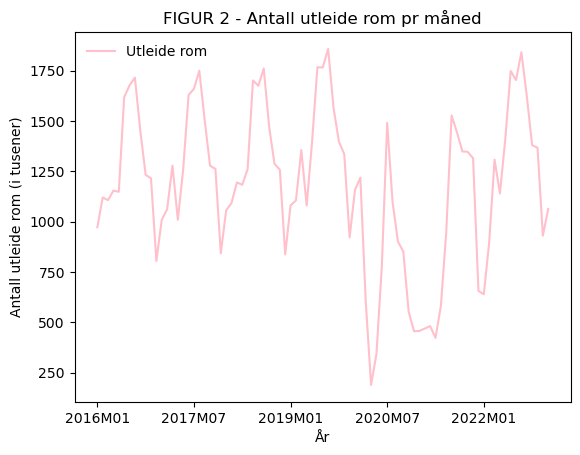

In [7]:
#legger til "ticks" for en mer oversiktlig figur 
xticks = np.arange(0, 100, 18)

fig, ax = plt.subplots()
ax.set_ylabel('Antall utleide rom (i tusener)')
ax.set_xlabel('År')
ax.set_xticks(xticks)
ax.plot(df['måned'], df['value']/1000, label='Utleide rom', color = "pink")
ax.set_title('FIGUR 2 - Antall utleide rom pr måned')
ax.legend(loc='best',frameon=False);

Også her ser vi den samme trenden som vi så på figur 1, med en økning i tiden før pandemien, for så å treffe en sterk nedgang etterfulgt av en rask oppbygging. 
Som figuren viser er det er klart flest overnattinger i sommermånedene - vi har en klar høysesong og lavsesong i Norge.  Mer om sesongvariasjoner i kapittel 2.3. 


### 2.2 Økonomien bak norsk reiseliv

Figur 3 viser utviklingen av det samlede bruttoproduktet av alle reiselivsnæringene mellom 2011 og 2020. Dette gir oss ett overblikk over utviklingen av bransjen i perioden før pandemien. Denne dataen stopper imidlertidig i 2020, og vi får dermed ikke se utviklingen etter pandemien. Ut ifra trendene fra de andre dataene som omhandler samme sektoren kan vi se for oss at disse tallene stiger igjen de senere årene. 

In [8]:
postUrl = "https://data.ssb.no/api/v0/no/table/10603/"
apiQuery = {
  "query": [
    {
      "code": "HovedstReise",
      "selection": {
        "filter": "item",
        "values": [
          "BPROD"
        ]
      }
    },
    {
      "code": "Reiseliv",
      "selection": {
        "filter": "item",
        "values": [
          "NORTOT"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "LopPriser"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

def apiToDataframe(postUrl, query):



    res = requests.post(postUrl, json=query)

    ds = pyjstat.Dataset.read(res.text)

    df = ds.write('dataframe')

    df_id = ds.write('dataframe', naming='id')

    return df, df_id, ds

In [9]:
df, df_id, ds = apiToDataframe(postUrl, apiQuery)

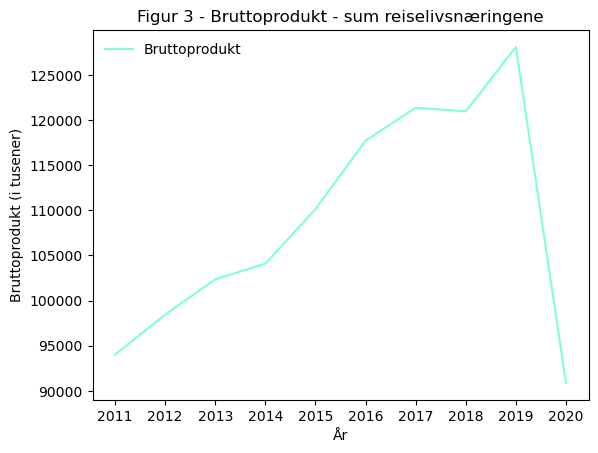

In [10]:
    fig, ax = plt.subplots()
ax.set_ylabel('Bruttoprodukt (i tusener)')
ax.set_xlabel('År')
ax.plot(df['år'], df['value'], label='Bruttoprodukt', color="aquamarine")
ax.set_title('Figur 3 - Bruttoprodukt - sum reiselivsnæringene')
ax.legend(loc='best',frameon=False);

Data hentet fra SSB tabell 13156. Vi ser et spesielt stort fall i 2020 sammenlignet med de andre figurene. Vi får her se hvilket stort fall sektoren som helhet tok som følge av Covid. 

#### 2.3 Sesongvariasjoner

Sesongvariasjoner er en særs stor faktor i det norske turismemarkedet. Turiststrømmen varierer stort gjennom året, noe som påvirker turistnæringen. Vi skiller her grovt sett mellom sommer- og vintersesongen. Sommeren regnes som høysesong, og står for mesteparten av turismen og hotellovernattinger,  imens vinteren står for en mindre andel (se figur 2).  

Hvor i Norge turister besøker avhenger også av sesong. Om sommeren er det eksempelvis mer populært å besøke kystbyer og områder med stort fokus på naturen, som Lofoten og vesterålen. Om vinteren er områder med alpinanlegg og langrennsløyper mer populært. Dette kan være destinasjoner som Hemsedal, Trysil eller Geilo. Det har også de siste årene blitt stadig mer populært å besøke Nord-Norge for å se nordlyset. (NHO reiseliv, 2019) 
Sesongvariasjonene i Norge kan skape utfordringer for turistnæringen, spesielt for hoteller som opplever stor tilstrømming ved høysesong, men som samtidig sliter med lavt belegg ved lavsesong.


### 3 – Samfunnsøkonomiske effekter av en turistskatt

#### 3.1 formål og potensielle fordeler ved innføring av turistskatt på overnattinger 

Innføringen av en turistskatt på overnattinger kan ha flere begrunnelser og mål bak seg (jfr delkapittel 1.2). Som oftest skal disse bidra til å forbedre infrastruktur, redusere turismens spor, bevare lokale attraksjoner og kultur eller utjevne belastningen turismen medbringer. 

#### 3.2 Markedet for overnattinger uten turistskatt

Likevektsprisen og kvantiteten som oppstår i et uforstyrret marked, altså et marked uten skatter som en turistskatt eller andre eksterne avgifter, bestemmes utelukkende av skjæringspunktet mellom tilbudet og etterspørselen. I figur 4 tar jeg inspirasjon fra koden fra «forelesning 5 – økonomisk politikk: avgifter» for å lage et eksempel på hvordan dette markedet kan se ut. Her er den teoretiske markedslikevekten uthevet ved punkt T. 


In [13]:
import numpy as np
from matplotlib import pyplot as plt
def tilbud(p,t):
    return -100+4.3*(p-t)

def etterspørsel(p,T):
    return 500 - 3.2*(p+T)


p_num=np.linspace(0.1,100,100)

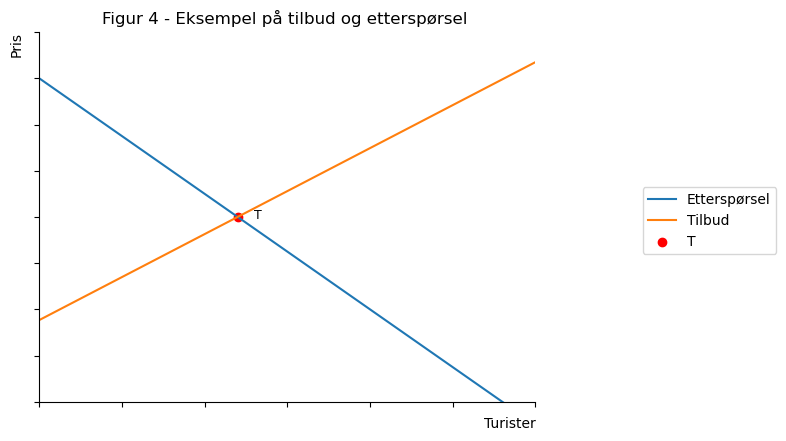

In [24]:
def create_ax():
    fig, ax = plt.subplots()
    ax.set_ylabel('Pris', loc='top')
    ax.set_xlabel('Turister', loc='right')
    ax.set(xlim=(220,280))
    ax.set(ylim=(70,90))
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    return fig, ax
fig, ax = create_ax()
ax.plot(etterspørsel(p_num, 0),p_num, label='Etterspørsel')
ax.plot(tilbud(p_num, 0),p_num, label='Tilbud')
ax.scatter(244,80, color="red", label='T')
ax.annotate('T', xy=(246,79.9), size=9)
ax.set_title('Figur 4 - Eksempel på tilbud og etterspørsel ')
ax.legend(bbox_to_anchor=(1.5,0.6))

Eksempel på hvordan markedet ser ut før en eventuell skatt

#### 3.2.1 hvordan endringer kan vi forvente ved innføring av en turistskatt?

Skatteleggingen av et marked forstyrrer markedet ved å heve prisen fra den naturlige likevekten
mellom tilbud og etterspørsel. Figur 4 illustrerer dette. Etter skatten legges til flyttes tilbudskurven
11
oppover basert på hvor stor skatten er. Den nye likevektsprisen, T1, er høyere enn tidligere, og vi
ser da at kvantiteten som etterspørres minker, og vi flytter oss lenger inn på X-aksen.

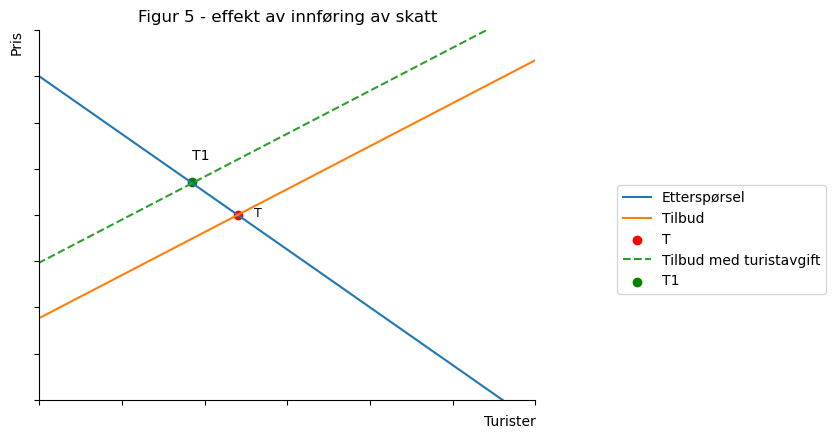

In [26]:
ax.plot(tilbud(p_num, 3),p_num, label='Tilbud med turistavgift',linestyle="dashed")
ax.text(238.5, 83, "T1")
ax.scatter(238.5,81.8, color="green", label='T1')
ax.set_title('Figur 5 - effekt av innføring av skatt')
ax.legend(bbox_to_anchor=(1.6,0.6))
fig

I tillegg er det viktig at turistskattenes inntekter brukes riktig, og at de faktisk støtter turistindustrien.
En turistskatt kan redusere etterspørselen ytterligere om inntektene ikke brukes til å støtte
turistmålets attraktivitet. Så lenge det er konkurranse for turistmål som anses som gode alternativer
for de som er skattebelagt, kan skattene ikke bare flytte likevekten lenger opp på etterspørsel
funksjonen (fra T til T1) men også skape et nedoverskift på etterspørselen, som etter tur reduserer
antallet turister fra T1 til T2. Disse virkningene, som potensielt kan flytte likevekten fra T til T2,
er bekymringsverdig for bedrifter innen turistsektoren, som ofte er imot besøksbidrag og lignende
ordninger. (Eugeni, Riera, & Rosello, 2003)

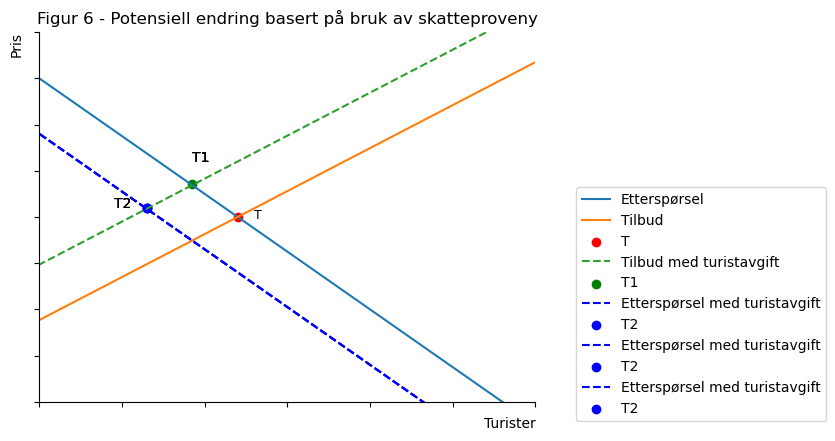

In [30]:
ax.plot(etterspørsel(p_num,3),p_num, label='Etterspørsel med turistavgift',color='blue', linestyle="dashed")
ax.text(238.5, 83, "T1")
ax.text(229,80.5 , "T2")
ax.scatter(233,80.5, color="blue", label='T2')
ax.set_title('Figur 6 - Potensiell endring basert på bruk av skatteproveny')
ax.legend(bbox_to_anchor=(1.6,0.6))
fig

### 3.3 Potensielle effektivitets- og fordelingseffekter av en turistskatt

#### 3.3.1 Endring i turistsammensetning

En potensiell fordelingseffekt som kan komme av en turistskatt kan være en endring i sammensetningen
av turister som kommer. Skatten øker prisen, og når prisen stiger, er det naturlig at noen
potensielle turister velger andre alternative destinasjoner. De som fortsatt velger å dra til det
skattebelagte området har høyere betalingsvilje – i de fleste tilfeller folk med høyere budsjett.

#### 3.3.2 Dødvektstap

Som diskutert over, forstyrrer innføringen av en skatt den naturlige likevekten mellom tilbud og
etterspørsel ved å øke prisen. Dette gjør at prisen overstiger det noen av forbrukerne er villige til å
betale, og enkelte av dem velger derfor å ikke kjøpe eller benytte seg av tjenesten – i dette tilfellet i
form av hotellovernattinger. Dette kalles for dødvektstap. Altså – hvis turistskatten er for høy, kan
dette føre til at det totale antallet turister som besøker Norge og overnatter på hoteller og andre
overnattingssteder blir redusert. Dette kan igjen resultere i et dødvektstap for turistnæringen og
økonomien som helhet, da færre turister betyr mindre inntekter for hoteller, restauranter, og alle
andre virksomheter som avhenger av turisme. Dette kan igjen føre til tap av arbeidsplasser, og
dermed ende med å bli en utgift for myndighetene og motvirke målet om å skaffe ekstra inntekter.

#### 3.3.3 Forebygging av dødvektstap

Ideelt sett ønsker vi å sette en turistskatt på overnattinger som er tilstrekkelig høy til å oppnå den
ønskede effekten, samtidig som den er lav nok til å ikke begrense ønsket turiststrøm og redusere
inntektene til den norske turistindustrien og lokalsamfunnet.
For å gjøre dette må vi ha en konkret plan for inntektene – hva skal midlene brukes til, og hvor
mye skal brukes til hva? Her må vi kunne svare på disse spørsmålene på en slik måte at Norge som
turistdestinasjon forholder seg attraktiv, til tross for en høyere pris grunnet skattelegging, samtidigsom vi skaper en bedre infrastruktur for turisme, og minsker fotsporene turismen lager. For å
kunne gjøre dette må vi kartlegge prisfølsomheten til sektoren vi skattelegger.

#### 3.3 Priselastisitet

Når en skal innføre skatter på en sektor som reiseliv, er det viktig å vite hvor prisfølsom den
aktuelle sektoren er. I Spania er det gjort mye forskning på området, da turisme er en betydelig
bidragsyter til landets BNP, på rundt 16% (PriceWaterhouseCoopers, 2017). I en rapport angående
internasjonal etterspørsel for turisme på Balearene estimeres priselastisiteten for turistovernattinger
til å være på -1.65. (Garin-Munoz & Montero-Martin, 2006) Dette er høye tall, og tilsier at en
prisøkning på 1% vil resultere i en reduksjon på 1.65% for turistovernattinger. Dette, ifølge EUs
rapport «The impact of taxes on the competetiveness of European tourism» kommer trolig som
følge av at turister som besøker Balearene, har veldig like alternativer på relativt like prisnivå. På
samme måte er det viktig å kartlegge prisfølsomhet på overnattinger i den norske turistsektoren,
slik at en kan forutse utviklingen som kommer som resultat av skattelegging, og basert på dette
bestemme størrelsen på avgiftene.
Det er vanskelig å finne gode estimater på prisfølsomheten i norsk turisme, men en rapport for
Transportøkonomisk Institutt «Betydningen av indirekte skatter og avgifter for norske reiselivsnæringers
konkuranseevne» beregner imidlertid et intervall for feriereiser til og i Norge til å være
mellom minus 1 til minus 1,5. (Dybedal, Hansen, Ibenholdt, & Brendemoen, 2003) Det poengteres
også at elastisitetene for reisende fra Sverige og Danmark sannsynligvis er høyere. Selv om disse
estimatene er noe generelle, kan vi anta at vi har et bedre utgangspunkt til å innføre skatter enn
strandøyer som Balearene. Dette kan skyldes at vi har mindre direkte konkurranse – norsk turisme
baserer seg ikke hovedsakelig på godt på vær, slik som mange destinasjoner som Balearene. Turister
som kommer til Norge tiltrekkes ofte ikke av ting en kan finne mange steder. Eksempelvis kommer
flere hundretusener i året til Tromsø for å se på nordlyset (NHO reiseliv, 2019). Dette kan bare
gjøres i en håndfull land, og elastisiteten reduseres som resultat av dette – nordlysturistene har få
aktuelle alternativer til Nord-Norge, og en prisøkning vil dermed ha mindre å si for deres valg om
å reise til Tromsø enn den samme økningen i pris på en typisk «sydenferie» på Balearene.

### 4 Konklusjon

Etter å ha gjennomgått forskjellige aspekter ved en eventuell innføring av turistskatt på overnattinger
i Norge, er det ikke enkelt å gi en entydig konklusjon på om dette er en god idé eller ikke.
Vi har etablert potensielle fordeler og ulempe en slik skatt kan føre til, og diskutert hvilke faktorer
som utgjør hvordan skatten vil fungere i praksis. Det er klart at innføring av turistskatt vil gi en
ekstra inntektskilde til kommunene og staten, og disse inntektene kan brukes til å finansiere ulike
tiltak som kan forbedre turistopplevelsen og øke bærekraftigheten i turistnæringen. Samtidig er
det viktig å trå varsomt, slik at vi ikke ender med store dødvektstap eller andre uønskede konsekvenser.
Basert på dette anbefales det at det utarbeides en grundig plan med et klart budsjett
på hva skatteinntektene skal brukes til, og at det settes klare mål for hvordan skatten skal bidra
til å forbedre turistopplevelsen og øke bærekraftigheten.
14